# Why do we need encoding?

Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values

### Creating Dataframe

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
data = pd.DataFrame({ 'gender' : ['Male', 'Female', 'Male', 'Female', 'Female'],
                       'class' : ['A','B','C','D','A'],
                        'city' : ['Delhi','Gurugram','Delhi','Delhi','Gurugram'] })
data.head()

,gender,class,city
0,Male,A,Delhi
1,Female,B,Gurugram
2,Male,C,Delhi
3,Female,D,Delhi
4,Female,A,Gurugram


# Category Encoder Library

### One-Hot Encoding

In [ ]:
#!pip install category_encoders
import category_encoders as ce
ce_OHE = ce.OneHotEncoder(cols=['gender','city'])

data1 = ce_OHE.fit_transform(data)
data1.head()

,gender_1,gender_2,class,city_1,city_2
0,1,0,A,1,0
1,0,1,B,0,1
2,1,0,C,1,0
3,0,1,D,1,0
4,0,1,A,0,1


### Binary Encoding

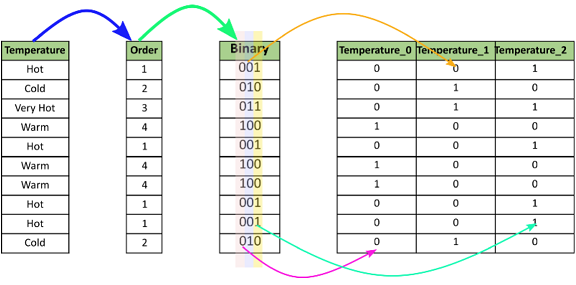

In [ ]:
ce_be = ce.BinaryEncoder(cols=['class']);
data1 = ce_be.fit_transform(data["class"]);
data1

,class_0,class_1,class_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,0,0,1


# Pandas Library

### One-Hot Encoding

In [ ]:
pd.get_dummies(data,columns=["gender","city"])

,class,gender_Female,gender_Male,city_Delhi,city_Gurugram
0,A,0,1,1,0
1,B,1,0,0,1
2,C,0,1,1,0
3,D,1,0,1,0
4,A,1,0,0,1


# Sklearn Library

### One-Hot Encoding

In [ ]:
s = (data.dtypes == 'object')
cols = list(s[s].index)
cols

['gender', 'class', 'city']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [ ]:
data_gender = pd.DataFrame(ohe.fit_transform(data[["gender"]]))
data_gender

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
#for all categorical variables
data_cols = pd.DataFrame(ohe.fit_transform(data[cols]))
data_cols

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Label Encoding

In label encoding, each category is assigned a value from 1 through N where N is the number of categories for the feature. There is no relation or order between these assignments.

In [ ]:
print(data[["class"]].dtypes)
data[["class"]]

class    object
dtype: object


,class
0,A
1,B
2,C
3,D
4,A


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_class = le.fit_transform(data[["class"]])
print(le_class.dtype)
print(le_class.shape)
le_class

int64
(5,)


array([0, 1, 2, 3, 0])

Note: It will be error if input is more than one columns because it's for label (Label Encoder) not input

### Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe_class = oe.fit_transform(data[["class"]])
print(oe_class.dtype)
print(oe_class.shape)
oe_class

float64
(5, 1)


array([[0.],
       [1.],
       [2.],
       [3.],
       [0.]])

# Without Library

### Ordinal Encoding

In [ ]:
temp = {'temperature' :['very cold', 'cold', 'warm', 'hot', 'very hot']}
df = pd.DataFrame(temp,columns=["temperature"])

temp_dict = {'very cold': 1,'cold': 2,'warm': 3,'hot': 4,"very hot":5}
df

,temperature
0,very cold
1,cold
2,warm
3,hot
4,very hot


In [ ]:
df["temp_ordinal"] = df.temperature.map(temp_dict)
df

,temperature,temp_ordinal
0,very cold,1
1,cold,2
2,warm,3
3,hot,4
4,very hot,5


# Encoding for Machine Learning

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
dataset = pd.read_csv(url, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [ ]:
data = dataset.values
data.shape

(286, 10)

In [ ]:
data[0]

array(["'40-49'", "'premeno'", "'15-19'", "'0-2'", "'yes'", "'3'",
       "'right'", "'left_up'", "'no'", "'recurrence-events'"],
      dtype=object)

In [ ]:
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
X_train

array([["'50-59'", "'ge40'", "'25-29'", ..., "'left'", "'right_low'",
        "'no'"],
       ["'30-39'", "'premeno'", "'5-9'", ..., "'left'", "'right_low'",
        "'no'"],
       ["'50-59'", "'premeno'", "'50-54'", ..., "'right'", "'left_up'",
        "'yes'"],
       ...,
       ["'60-69'", "'ge40'", "'10-14'", ..., "'right'", "'left_low'",
        "'no'"],
       ["'60-69'", "'ge40'", "'40-44'", ..., "'right'", "'left_low'",
        "'no'"],
       ["'60-69'", "'ge40'", "'45-49'", ..., "'left'", "'central'",
        "'no'"]], dtype='<U11')

### Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [ ]:
X_train

array([[ 3.,  0.,  4., ...,  0.,  3.,  0.],
       [ 1.,  2.,  9., ...,  0.,  3.,  0.],
       [ 3.,  2., 10., ...,  1.,  2.,  1.],
       ...,
       [ 4.,  0.,  1., ...,  1.,  1.,  0.],
       [ 4.,  0.,  7., ...,  1.,  1.,  0.],
       [ 4.,  0.,  8., ...,  0.,  0.,  0.]])

In [ ]:
X_train.shape

(191, 9)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
#Ordinal encode target variable using Label Encoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
y_test[0:5]

array([1, 0, 0, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.coef_

array([[-0.15999111, -0.01254931,  0.03559176,  0.09381466,  0.38863796,
         0.80481491, -0.55715284,  0.14885472,  0.10726919]])

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(max_depth = 5)
# rfc = rfc.fit(X_train,y_train)

# fn = ["X1","X2","X3","X4","X5","X6","X7","X8","X9"]
# cn = ["No","Yes"]

In [ ]:
# from sklearn import tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# _ = tree.plot_tree(rfc.estimators_[1], feature_names=fn, class_names=cn, filled=True)

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
X_train

<191x43 sparse matrix of type '<class 'numpy.float64'>'
	with 1719 stored elements in Compressed Sparse Row format>

In [ ]:
y_train[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0])

In [ ]:
model.coef_

array([[-9.21479643e-02,  7.63602994e-01, -2.36516522e-01,
        -2.36938170e-01, -5.09390026e-02, -1.47067681e-01,
        -2.38835421e-01,  3.91888597e-01, -1.53059522e-01,
        -3.13997303e-01, -1.14120405e+00,  4.57098959e-01,
         4.88760959e-01,  4.59600810e-01,  7.26091881e-01,
        -3.44753208e-01,  2.78235559e-02, -2.71385835e-01,
        -3.94554613e-01,  3.06512500e-01, -3.48167402e-01,
         1.88580752e-01,  7.26708538e-03,  2.21558504e-01,
        -2.90248754e-01, -1.13151672e-02,  2.32318636e-01,
        -2.80279276e-01,  2.80020689e-01,  2.52240604e-04,
        -4.14423839e-01, -3.84927487e-01,  7.99344980e-01,
         2.30486807e-01, -2.30493154e-01, -9.20470385e-01,
         2.52637649e-01,  7.95849421e-02, -1.91994116e-01,
         3.49359654e-01,  4.30875910e-01, -3.91047568e-02,
         3.90984107e-02]])

In [ ]:
X.shape

(286, 9)

In [ ]:
X_train.shape

(191, 43)

In [ ]:
jml = 0
for i in range(len(dataset.columns)):
  print(set(dataset[i]))
  jml = jml+len(set(dataset[i]))

{"'50-59'", "'30-39'", "'60-69'", "'70-79'", "'40-49'", "'20-29'"}
{"'lt40'", "'ge40'", "'premeno'"}
{"'10-14'", "'5-9'", "'45-49'", "'50-54'", "'20-24'", "'0-4'", "'15-19'", "'35-39'", "'40-44'", "'25-29'", "'30-34'"}
{"'0-2'", "'3-5'", "'24-26'", "'9-11'", "'6-8'", "'12-14'", "'15-17'"}
{nan, "'yes'", "'no'"}
{"'1'", "'3'", "'2'"}
{"'left'", "'right'"}
{nan, "'left_up'", "'central'", "'right_up'", "'left_low'", "'right_low'"}
{"'yes'", "'no'"}
{"'no-recurrence-events'", "'recurrence-events'"}


In [ ]:
shape_y = 2
shape_x = jml - shape_y
shape_x

43

# Avoiding One-Hot Encoding



*   A lower amount of dimensions is better
*   There will be a sea of zeroes
*   Can causes problems of parallelism and multicollinearity in high dimensions
*   List item





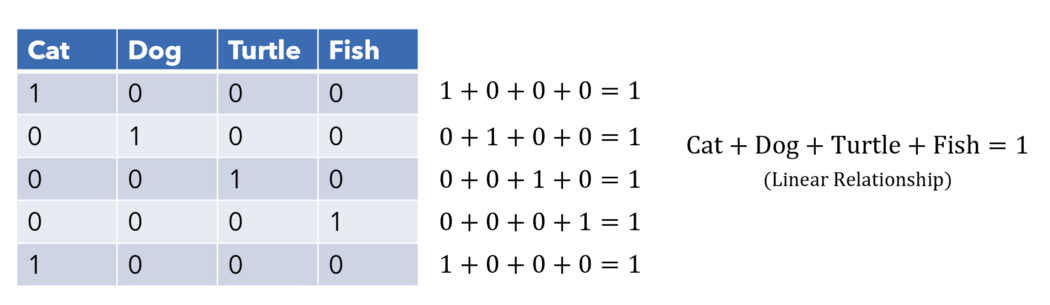

### Target Encoding


Pros:
*   Low dimensionality
*   Each value in the column is replaced with the mean target value for that category

Cons:
*   It more difficult for the model to learn relationships between a mean-encoded variable and another variable
*   Very sensitive to the y-variable
* Homogenous values after encoding




[Target Encoding Example](https://miro.medium.com/max/629/1*W77md1OC9HSuAFy9b0LEIw.png)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from category_encoders import TargetEncoder
enc = TargetEncoder()

training_set = enc.fit(X_train, y_train)
training_set = enc.transform(X_train)
training_set.head()

,0,1,2,3,4,5,6,7,8
0,0.246154,0.261905,0.324324,0.211268,0.217687,0.159091,0.317308,0.277778,0.230769
1,0.434783,0.274510,0.012912,0.211268,0.217687,0.184783,0.317308,0.277778,0.230769
2,0.246154,0.274510,0.326052,0.211268,0.459459,0.184783,0.218391,0.269841,0.395833
3,0.434783,0.274510,0.324324,0.211268,0.217687,0.159091,0.317308,0.062500,0.230769
4,0.254237,0.274510,0.290323,0.211268,0.217687,0.184783,0.218391,0.300000,0.230769


###Leave-one-out encoding
- Calculating the average, excluding the current row value 
- This levels off the effect of outliers and creates more diverse encoded values

In [ ]:
from category_encoders import LeaveOneOutEncoder
loe = LeaveOneOutEncoder()

training_set = loe.fit(X_train, y_train)
training_set = loe.transform(X_train)
training_set.head()

,0,1,2,3,4,5,6,7,8
0,0.246154,0.261905,0.324324,0.211268,0.217687,0.159091,0.317308,0.277778,0.230769
1,0.434783,0.274510,0.000000,0.211268,0.217687,0.184783,0.317308,0.277778,0.230769
2,0.246154,0.274510,0.333333,0.211268,0.459459,0.184783,0.218391,0.269841,0.395833
3,0.434783,0.274510,0.324324,0.211268,0.217687,0.159091,0.317308,0.062500,0.230769
4,0.254237,0.274510,0.290323,0.211268,0.217687,0.184783,0.218391,0.300000,0.230769


### Frequency Encoding

In [ ]:
data_freq = pd.DataFrame({'class' : ['A','B','C','D','A',"B","E","E","D","C","C","C","E","A","A"]})
fe = data_freq.groupby("class").size()
fe

class
A    4
B    2
C    4
D    2
E    3
dtype: int64

In [ ]:
fe_ = fe/len(data_freq)
data_freq["data_fe"] = data_freq["class"].map(fe_).round(2)
data_freq.head()

,class,data_fe
0,A,0.27
1,B,0.13
2,C,0.27
3,D,0.13
4,A,0.27


### Time-Series Encoding

- Time-based features such as day of month, day of week, day of year, etc have a cyclic nature and have many feature values. 
- One-hot encoding day of monthfeature results in 30 dimensionality vector, day of year results in 366 dimension vector. 

[Sinus Cosinus](https://www.google.com/url?sa=i&url=https%3A%2F%2Fkumparan.com%2Fberita-unik%2Fsin-cos-tan-cara-menghitung-fungsi-dan-contoh-soal-1w8WIWJaJxO&psig=AOvVaw050kze5u4lXmLq2KfBXNRA&ust=1631600376253000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKCv75mn-_ICFQAAAAAdAAAAABAD)

In [ ]:
import pandas as pd
data = pd.DataFrame({ 'weekday_name' : ['Sunday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                       'class' : [6, 3, 4, 5, 6]})
data.head()

,weekday_name,class
0,Sunday,6
1,Thursday,3
2,Friday,4
3,Saturday,5
4,Sunday,6


In [ ]:
import math
from math import pi

def transformation(column):
  max_value = column.max()
  sin_values = [math.sin((2*pi*x)/max_value) for x in list(column)]
  cos_values = [math.cos((2*pi*x)/max_value) for x in list(column)]
  return sin_values, cos_values

In [ ]:
transformation(data['class'])

([-2.4492935982947064e-16,
  1.2246467991473532e-16,
  -0.8660254037844384,
  -0.8660254037844386,
  -2.4492935982947064e-16],
 [1.0, -1.0, -0.5000000000000004, 0.5000000000000001, 1.0])